# Clustering 4: rejecting single point detections

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
%matplotlib inline

In [2]:
a = [(0.01171875, 0.04296875, 0.0, 28.432327270507812), (0.021484375, 0.083984375, 0.0, 26.646419525146484), (0.0859375, 0.09765625, 0.0, 24.857213973999023), (6.86328125, -8.58984375, 0.0, 6.020599842071533), (10.6875, -2.759765625, 0.0, 10.0), (10.634765625, -3.1171875, 0.0, 13.424226760864258), (10.00390625, -4.8671875, 0.0, 16.53212547302246), (3.708984375, -0.0, 0.0, 17.923917770385742), (3.744140625, -0.234375, 0.0, 16.81241226196289), (3.875, -0.2421875, 0.0, 16.627578735351562), (3.923828125, -0.123046875, 0.0, 18.512582778930664), (3.962890625, -0.248046875, 0.0, 16.627578735351562), (4.142578125, 0.12890625, 0.0, 17.558748245239258), (8.576171875, -4.951171875, 0.0, 12.304489135742188), (8.615234375, -4.974609375, 0.0, 13.617278099060059), (8.826171875, -4.68359375, 0.0, 14.149733543395996), (8.86328125, -4.703125, 0.0, 16.434526443481445), (8.728515625, -5.0390625, 0.0, 12.787535667419434), (1.5859375, -0.302734375, 0.0, 9.542425155639648), (3.884765625, -3.37890625, 0.0, 12.304489135742188), (3.609375, -3.732421875, 0.0, 13.424226760864258), (3.640625, -3.763671875, 0.0, 13.222192764282227), (4.015625, -3.4921875, 0.0, 12.552724838256836), (4.048828125, -3.521484375, 0.0, 12.552724838256836), (3.927734375, -3.71875, 0.0, 12.787535667419434), (3.9609375, -3.75, 0.0, 12.304489135742188), (4.1484375, -3.607421875, 0.0, 11.461280822753906), (7.857421875, 2.029296875, 0.0, 10.0), (7.830078125, 2.294921875, 0.0, 12.552724838256836), (7.87109375, 2.306640625, 0.0, 12.041199684143066), (0.083984375, 0.025390625, 0.0, 25.69373893737793), (0.125, 0.041015625, 0.0, 24.653827667236328), (10.32421875, -3.779296875, 0.0, 4.771212577819824), (10.365234375, 3.794921875, 0.0, 10.0), (8.650390625, -6.92578125, 0.0, 13.424226760864258), (11.103515625, -0.6953125, 0.0, 15.797836303710938), (8.05078125, -1.013671875, 0.0, 9.542425155639648)]
PC = np.array(a)
PCXYR = PC[:,(1,0,3)] #throw away Z axis
PCXYR.shape

(37, 3)

In [3]:
centroids, labels, _ = cluster.k_means(PCXYR[:,0:2], 10)

In [4]:
labels

array([2, 2, 2, 6, 0, 0, 5, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 4, 4, 2, 2, 0, 8, 5, 9, 7], dtype=int32)

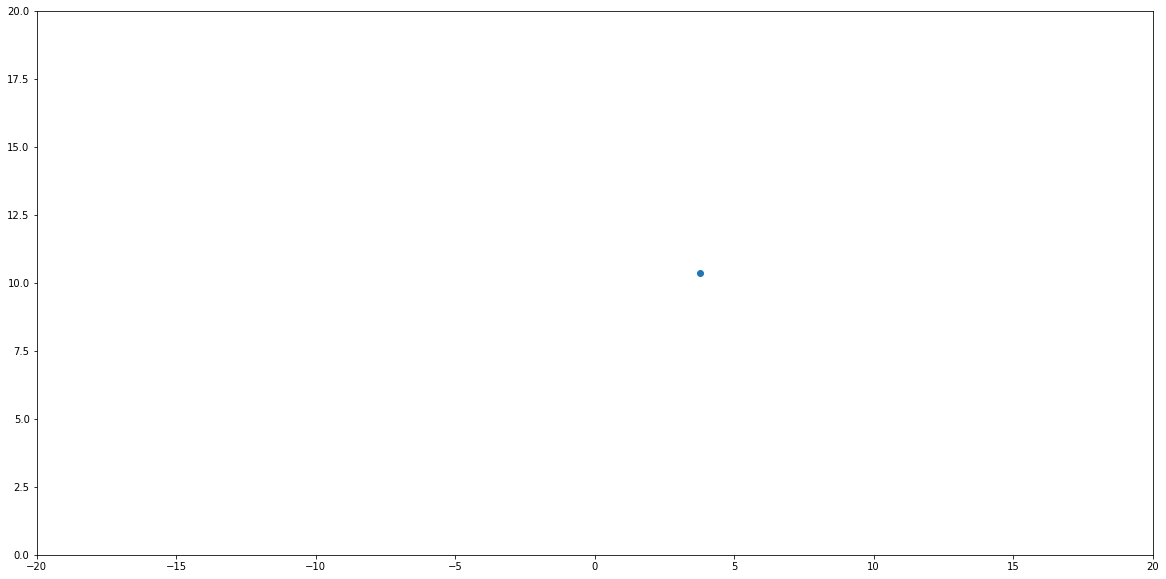

In [5]:
lbl = 8
plt.figure(figsize=(20,10))
axes = plt.gca()
axes.set_xlim([-20,20])
axes.set_ylim([0,20])
plt.scatter(PCXYR[:,0][labels==lbl], PCXYR[:,1][labels==lbl], cmap='jet')

In [6]:
def plot2DPC(arr_2d_pc):
    X, Y, reflectivity = [arr_2d_pc[:,i] for i in range(arr_2d_pc.shape[-1])]
    plt.figure(figsize=(20,10))
    axes = plt.gca()
    axes.set_xlim([-20,20])
    axes.set_ylim([-20,20])
    plt.scatter(X, Y, c=reflectivity, cmap='jet', vmin=0, vmax=20)
    plt.colorbar()
    plt.show()

In [7]:
clusters = np.array([PCXYR[labels == l] for l in np.unique(labels)])
masses = np.bincount(labels, weights=PCXYR[:,2])

In [8]:
#estimated size (std. dev. of the point cloud)
sizes = np.fromiter( ( np.sqrt(np.std(pc[:,1]) + np.std(pc[:,0])) for pc in clusters) , dtype=np.float)

#point count in a cluster
clusters_point_count = np.fromiter( (len(pc) for pc in clusters), dtype=np.int)

In [9]:
#filter out single points
no_single_detection_mask = sizes != 0

# (if there's just one point, stdev will be 0). Alternatively I could do:
# no_single_detection_mask = np.fromiter( (len(i)!=1 for i in cluster_clouds) , dtype=np.bool ) 

not_too_sparse_mask = sizes < clusters_point_count #basically at least 2 points per meter 
combined_mask = np.logical_and(not_too_sparse_mask, no_single_detection_mask)

In [10]:
not_too_sparse_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [11]:
no_single_detection_mask

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False])

In [21]:
clusters_fil = clusters[combined_mask]
centroids_fil = centroids[combined_mask]
sizes_fil = sizes[combined_mask]
masses_fil = masses[combined_mask]

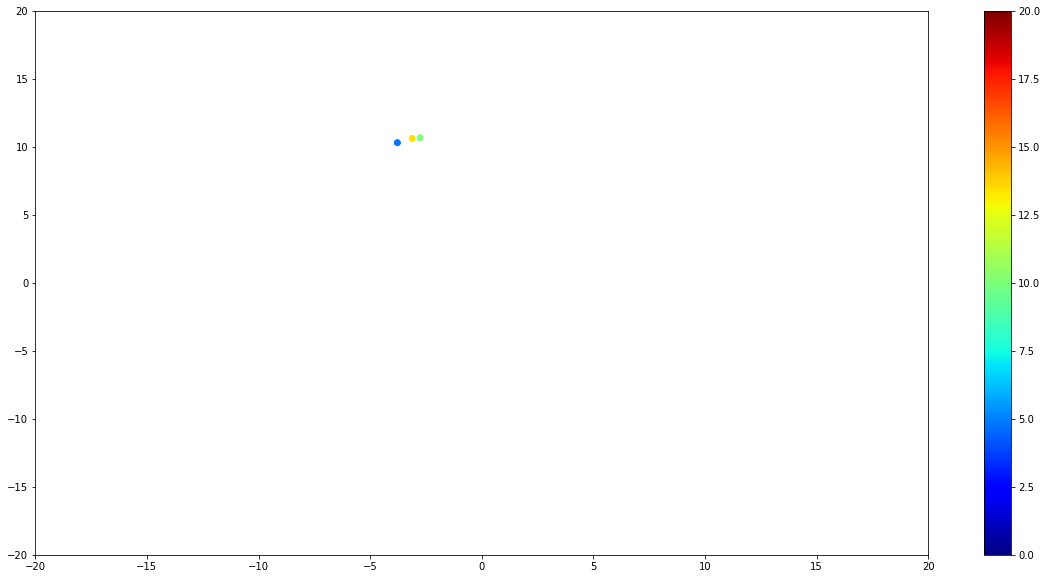

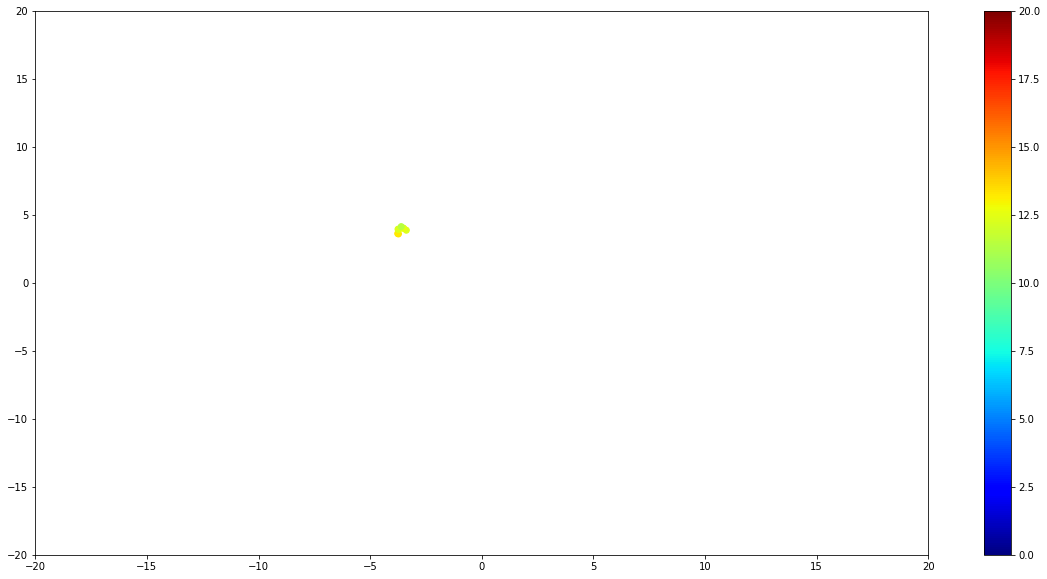

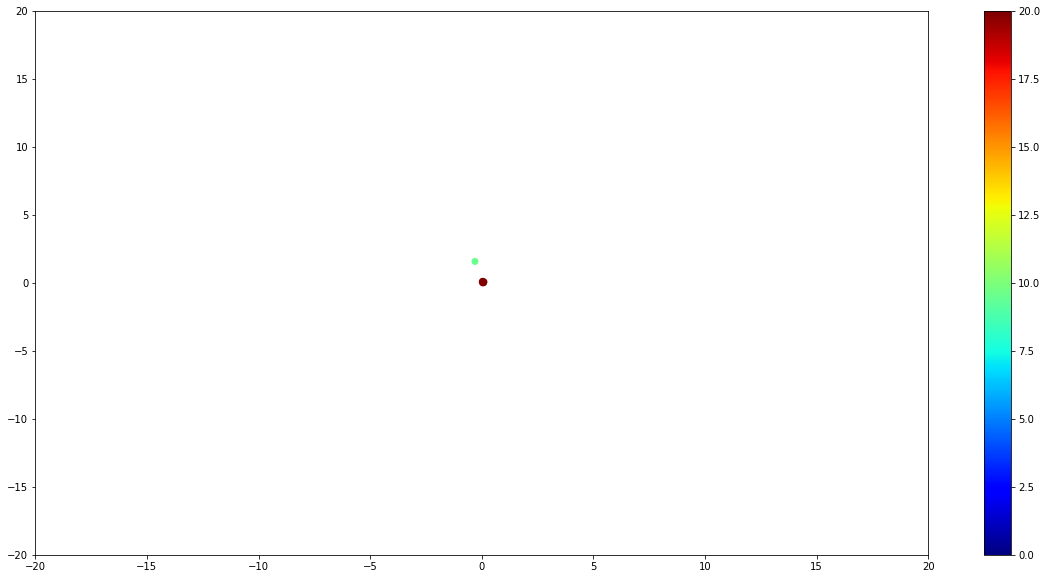

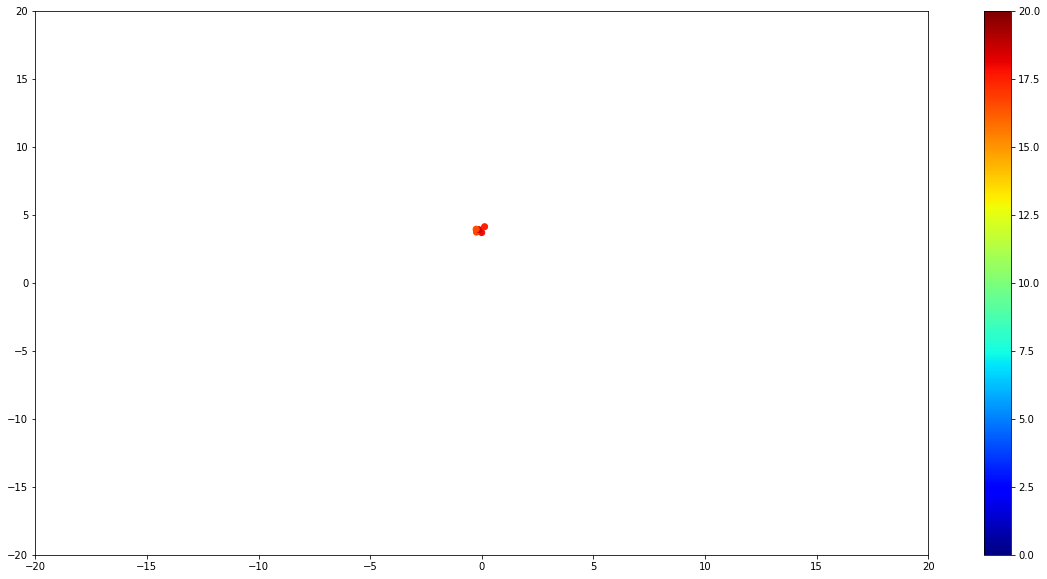

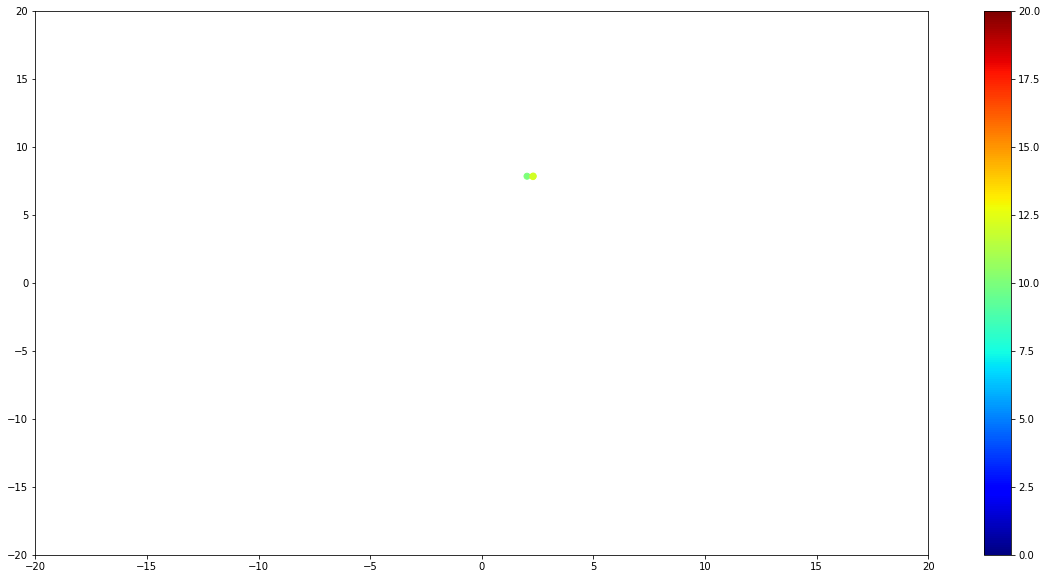

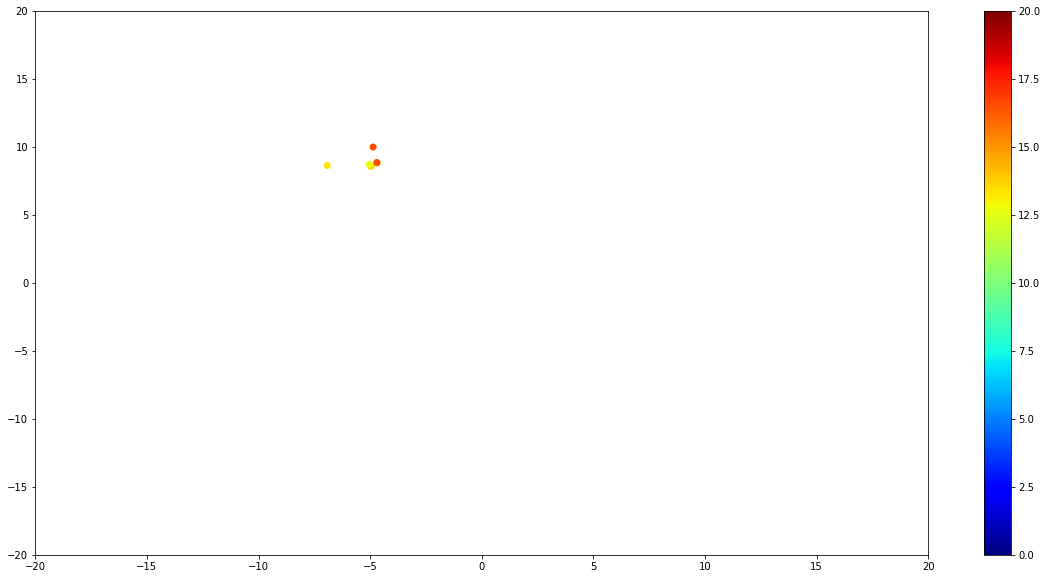

In [32]:
for c in clusters_fil:
    plot2DPC(c)

In [30]:
{
    'no_clusters': np.sum(combined_mask==True),
    'centroids': [list(el) for el in list(centroids_fil)],
    'masses': list(masses_fil),
    'sizes': list(sizes_fil)
}

{'no_clusters': 6,
 'centroids': [[-3.21875, 10.548828125],
  [-3.62060546875, 3.9045410156250004],
  [-0.001953125, 0.3190104166666661],
  [-0.11979166666666674, 3.892903645833334],
  [2.2102864583333326, 7.852864583333334],
  [-5.1635044642857135, 8.894810267857142]],
 'masses': [28.195439338684082,
  100.60966396331787,
  139.82595252990723,
  104.06281852722168,
  34.5939245223999,
  99.24991512298584],
 'sizes': [0.7633133887528869,
  0.5588402040469284,
  0.8395183142482785,
  0.5347013646877856,
  0.38094642165722165,
  1.0924814395881608]}